In [ ]:
#  Welcome to Fake and Spam news detector 

In [62]:
#Import all required library
import nltk
import re
import string
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import word_tokenize, sent_tokenize
from wordcloud import WordCloud, STOPWORDS

In [3]:
#Downloading nltk StopWords and Wordnet 
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tanmay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tanmay\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Dataset1
1.importing 1st dataset
2.EDA on 1st dataset
3.Data pre-processing

In [74]:
df = pd.read_csv(r"C:\Users\Tanmay\Desktop\Fake news detection project\datasets\news.csv")
df_first_4_columns = df.iloc[:, :4]


C:\Users\Tanmay\AppData\Local\Temp\ipykernel_3820\1563031665.py:1: DtypeWarning: Columns (24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\Tanmay\Desktop\Fake news detection project\datasets\news.csv")


ValueError: No axis named 10 for object type DataFrame

In [5]:
Dataset1.head()

Unnamed: 0                                              title  \
0       8476                       You Can Smell Hillary’s Fear   
1      10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2       3608        Kerry to go to Paris in gesture of sympathy   
3      10142  Bernie supporters on Twitter erupt in anger ag...   
4        875   The Battle of New York: Why This Primary Matters   

                                                text label Unnamed: 4  \
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE        NaN   
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE        NaN   
2  U.S. Secretary of State John F. Kerry said Mon...  REAL        NaN   
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE        NaN   
4  It's primary day in New York and front-runners...  REAL        NaN   

  Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9  ... Unnamed: 131  \
0        NaN        NaN        NaN        NaN        NaN  ...          NaN   
1        NaN        NaN        NaN        NaN        NaN  ...          NaN   
2        NaN        NaN        NaN        NaN        NaN  ...          NaN   
3        NaN        NaN        NaN        NaN        NaN  ...          NaN   
4        NaN        NaN        NaN        NaN        NaN  ...          NaN   

  Unnamed: 132 Unnamed: 133 Unnamed: 134 Unnamed: 135 Unnamed: 136  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          NaN          NaN          NaN          NaN          NaN   
4          NaN          NaN          NaN          NaN          NaN   

  Unnamed: 137 Unnamed: 138 Unnamed: 139 Unnamed: 140  
0          NaN          NaN          NaN          NaN  
1          NaN          NaN          NaN          NaN  
2          NaN          NaN          NaN          NaN  
3          NaN          NaN          NaN          NaN  
4          NaN          NaN          NaN          NaN  

[5 rows x 141 columns]

In [6]:
Dataset1.tail()

Unnamed: 0                                              title  \
7790       4490  State Department says it can't find emails fro...   
7791       8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
7792       8622  Anti-Trump Protesters Are Tools of the Oligarc...   
7793       4021  In Ethiopia, Obama seeks progress on peace, se...   
7794       4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label Unnamed: 4  \
7790  The State Department told the Republican Natio...  REAL        NaN   
7791  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...  FAKE        NaN   
7792   Anti-Trump Protesters Are Tools of the Oligar...  FAKE        NaN   
7793  ADDIS ABABA, Ethiopia —President Obama convene...  REAL        NaN   
7794  Jeb Bush Is Suddenly Attacking Trump. Here's W...  REAL        NaN   

     Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9  ... Unnamed: 131  \
7790        NaN        NaN        NaN        NaN        NaN  ...          NaN   
7791        NaN        NaN        NaN        NaN        NaN  ...          NaN   
7792        NaN        NaN        NaN        NaN        NaN  ...          NaN   
7793        NaN        NaN        NaN        NaN        NaN  ...          NaN   
7794        NaN        NaN        NaN        NaN        NaN  ...          NaN   

     Unnamed: 132 Unnamed: 133 Unnamed: 134 Unnamed: 135 Unnamed: 136  \
7790          NaN          NaN          NaN          NaN          NaN   
7791          NaN          NaN          NaN          NaN          NaN   
7792          NaN          NaN          NaN          NaN          NaN   
7793          NaN          NaN          NaN          NaN          NaN   
7794          NaN          NaN          NaN          NaN          NaN   

     Unnamed: 137 Unnamed: 138 Unnamed: 139 Unnamed: 140  
7790          NaN          NaN          NaN          NaN  
7791          NaN          NaN          NaN          NaN  
7792          NaN          NaN          NaN          NaN  
7793          NaN          NaN          NaN          NaN  
7794          NaN          NaN          NaN          NaN  

[5 rows x 141 columns]

In [7]:
Dataset1.nunique()

Unnamed: 0      7519
title           7085
text            6644
label            437
Unnamed: 4       315
                ... 
Unnamed: 136       1
Unnamed: 137       1
Unnamed: 138       1
Unnamed: 139       1
Unnamed: 140       1
Length: 141, dtype: int64

In [8]:
Dataset1["Article"] = Dataset1["title"] + Dataset1["text"]
Dataset1.sample(frac = 1) #Shuffle 100%

Dataset1.label[Dataset1.label == 'REAL'] = 1
Dataset1.label[Dataset1.label == 'FAKE'] = 0

Dataset1 = Dataset1.loc[:,['Article','label']]
Dataset1 = Dataset1.dropna()

In this step we will clean the data that will be used for training. The cleaning will involve these steps-
1.Removing all the extra information like brackets, any kind of puctuations - commas, apostrophes, quotes, question marks, and more.
2.Remove all the numeric text, urls

In [9]:
def wordpre(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) # remove special chars
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    return text

In [10]:
##  Applying the wordpre method to the dataset
Dataset1['Article']=Dataset1['Article'].apply(wordpre)

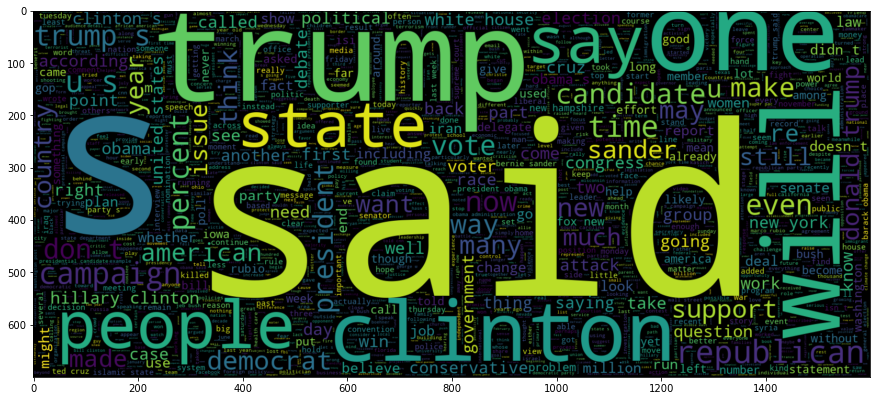

In [9]:
#word used in Real news 
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset1[Dataset1.label== 1].Article))
plt.imshow(wc, interpolation="bilinear")

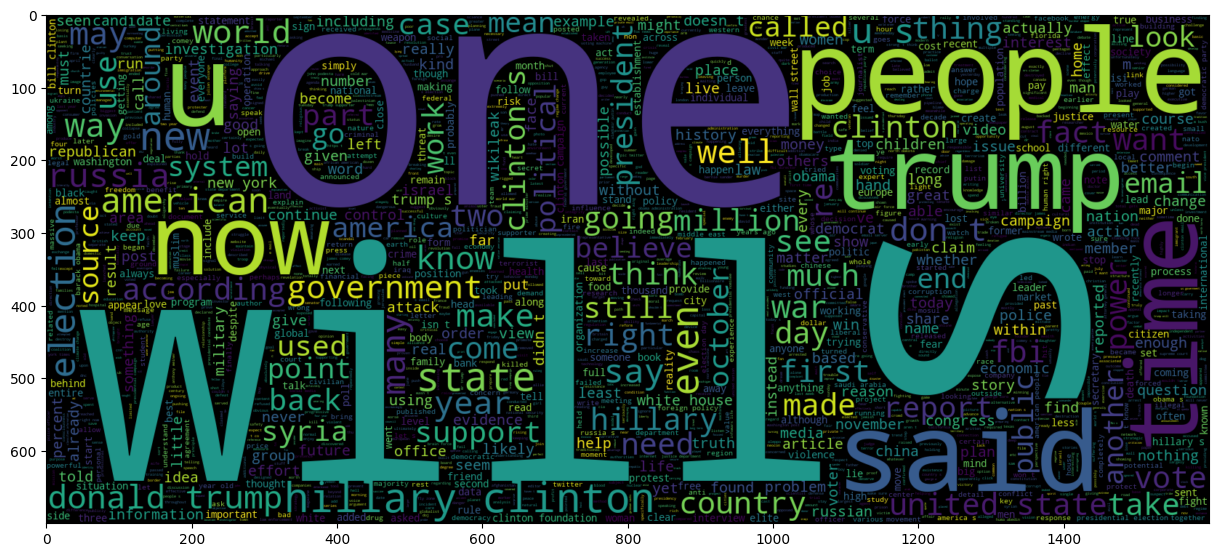

In [11]:
#word used in Fake news 
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset1[Dataset1.label== 0].Article))
plt.imshow(wc, interpolation="bilinear")

# Dataset2

In [12]:
Dataset2_true = pd.read_csv(r"C:\Users\Tanmay\Desktop\Fake news detection project\datasets\True.csv")
Dataset2_fake = pd.read_csv(r"C:\Users\Tanmay\Desktop\Fake news detection project\datasets\Fake.csv")

In [13]:
Dataset2_true.nunique()

title      20826
text       21192
subject        2
date         716
dtype: int64

In [14]:
Dataset2_fake.nunique()

title      17903
text       17455
subject        6
date        1681
dtype: int64

In [22]:
#Counting by Subjects in Real news
for key,count in Dataset2_true.subject.value_counts().items():
    print(f"{key}:\t{count}")
    
#Getting Total Rows
print(f"Total Records:\t{Dataset2_true.shape[0]}")

politicsNews:	11272
worldnews:	10145
Total Records:	21417


In [23]:
#Counting by Subjects in Fake news
for key,count in Dataset2_fake.subject.value_counts().items():
    print(f"{key}:\t{count}")
    
#Getting Total Rows
print(f"Total Records:\t{Dataset2_fake.shape[0]}")

News:	9050
politics:	6841
left-news:	4459
Government News:	1570
US_News:	783
Middle-east:	778
Total Records:	23481


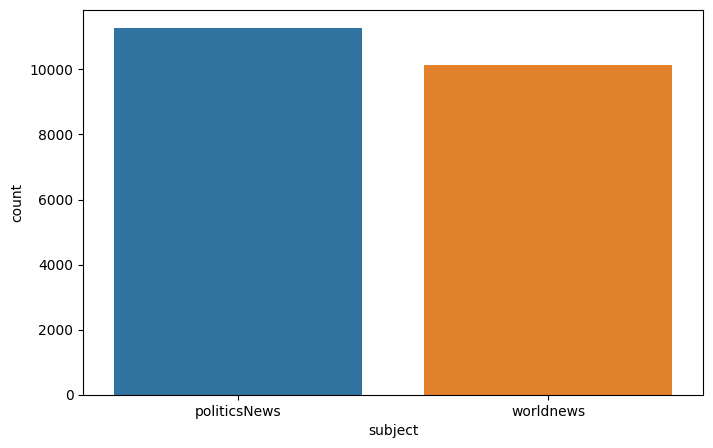

In [26]:
#ploting the Subjects in Real news
plt.figure(figsize=(8,5))
sns.countplot(x="subject", data=Dataset2_true)
plt.show()

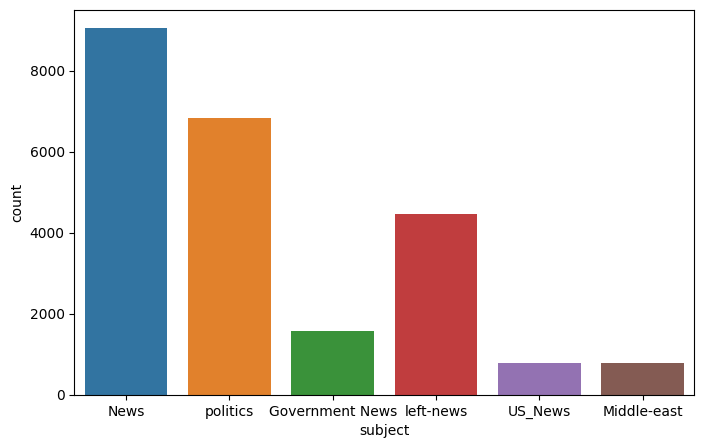

In [27]:
#ploting the Subjects in Fake news
plt.figure(figsize=(8,5))
sns.countplot(x="subject", data=Dataset2_fake)
plt.show()

In [28]:
Dataset2_true['label']= 1
Dataset2_fake['label']= 0
Dataset2 = pd.concat([Dataset2_true, Dataset2_fake])
Dataset2["Article"] = Dataset2["title"] + Dataset2["text"]
Dataset2.sample(frac = 1) #Shuffle 100%
Dataset2 = Dataset2.loc[:,['Article','label']]

In [29]:
Dataset2

Article  label
0      As U.S. budget fight looms, Republicans flip t...      1
1      U.S. military to accept transgender recruits o...      1
2      Senior U.S. Republican senator: 'Let Mr. Muell...      1
3      FBI Russia probe helped by Australian diplomat...      1
4      Trump wants Postal Service to charge 'much mor...      1
...                                                  ...    ...
23476  McPain: John McCain Furious That Iran Treated ...      0
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...      0
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...      0
23479  How to Blow $700 Million: Al Jazeera America F...      0
23480  10 U.S. Navy Sailors Held by Iranian Military ...      0

[44898 rows x 2 columns]

In [30]:
##  Applying the wordpre method to the dataset
Dataset2['Article']=Dataset2['Article'].apply(wordpre)

In [31]:
Dataset2.head()

Article  label
0  as u s  budget fight looms  republicans flip t...      1
1  u s  military to accept transgender recruits o...      1
2  senior u s  republican senator   let mr  muell...      1
3  fbi russia probe helped by australian diplomat...      1
4  trump wants postal service to charge  much mor...      1

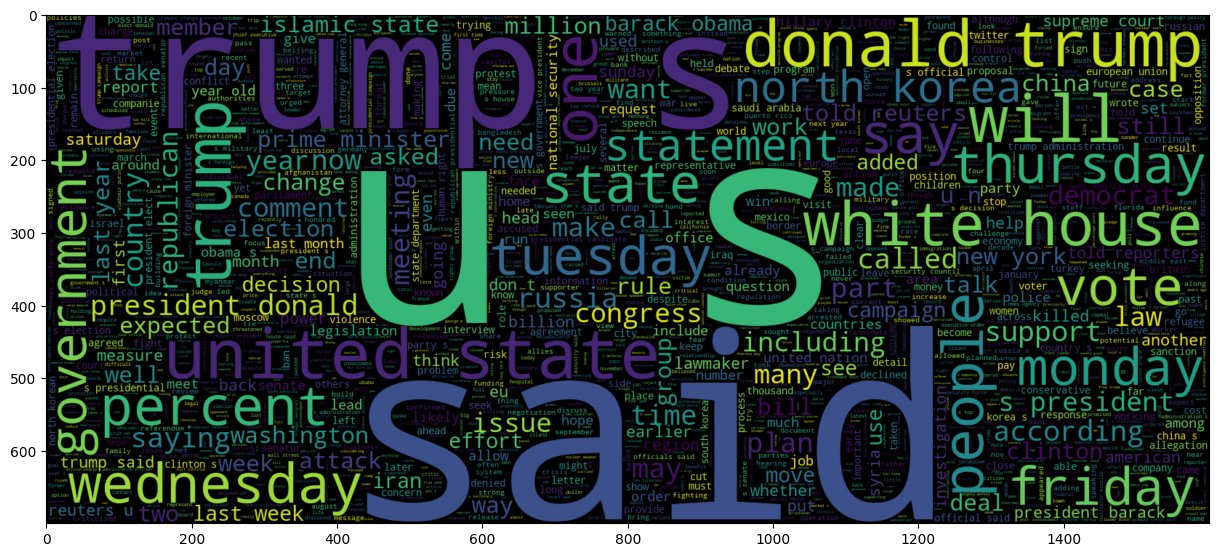

In [32]:
#word used in Real news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset2[Dataset2.label== 1].Article))
plt.imshow(wc, interpolation="bilinear")

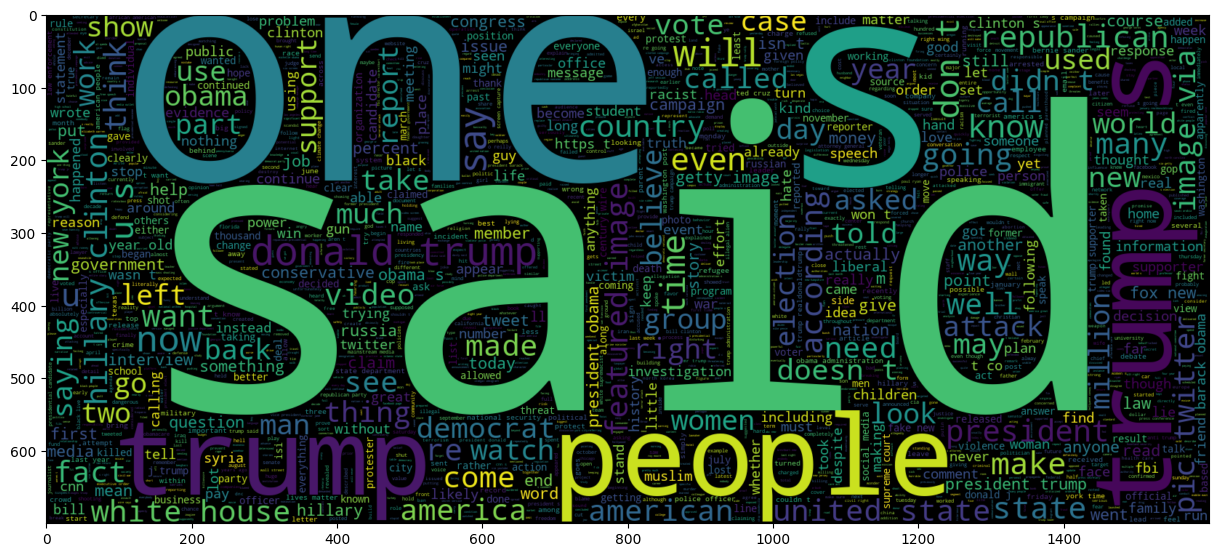

In [33]:
#word used in Fake news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset2[Dataset2.label== 0].Article))
plt.imshow(wc, interpolation="bilinear")

# Dataset 3

In [34]:
Dataset3_real = pd.read_csv(r"C:\Users\Tanmay\Desktop\Fake news detection project\datasets\politifact_real.csv")
Dataset3_fake = pd.read_csv(r"C:\Users\Tanmay\Desktop\Fake news detection project\datasets\politifact_fake.csv")

In [35]:
Dataset3_real['label']= 1
Dataset3_fake['label']= 0
Dataset3 = pd.concat([Dataset3_real, Dataset3_fake])
Dataset3["Article"] = Dataset3["title"]
Dataset3.sample(frac = 1) #Shuffle 100%
Dataset3 = Dataset3.loc[:,['Article','label']]

In [36]:
Dataset3

Article  label
0          National Federation of Independent Business      1
1                          comments in Fayetteville NC      1
2    Romney makes pitch, hoping to close deal : Ele...      1
3    Democratic Leaders Say House Democrats Are Uni...      1
4      Budget of the United States Government, FY 2008      1
..                                                 ...    ...
427        Who is affected by the government shutdown?      0
428  Lindsey Graham Threatens To Convert To Democra...      0
429  ELECTORAL COLLEGE ELECTOR COMMITS SUICIDE TO A...      0
430  Sarah Palin Calls To Boycott Mall Of America B...      0
431                                  Account Suspended      0

[1056 rows x 2 columns]

In [37]:
##  Applying the wordpre method to the dataset
Dataset3['Article']=Dataset3['Article'].apply(wordpre)

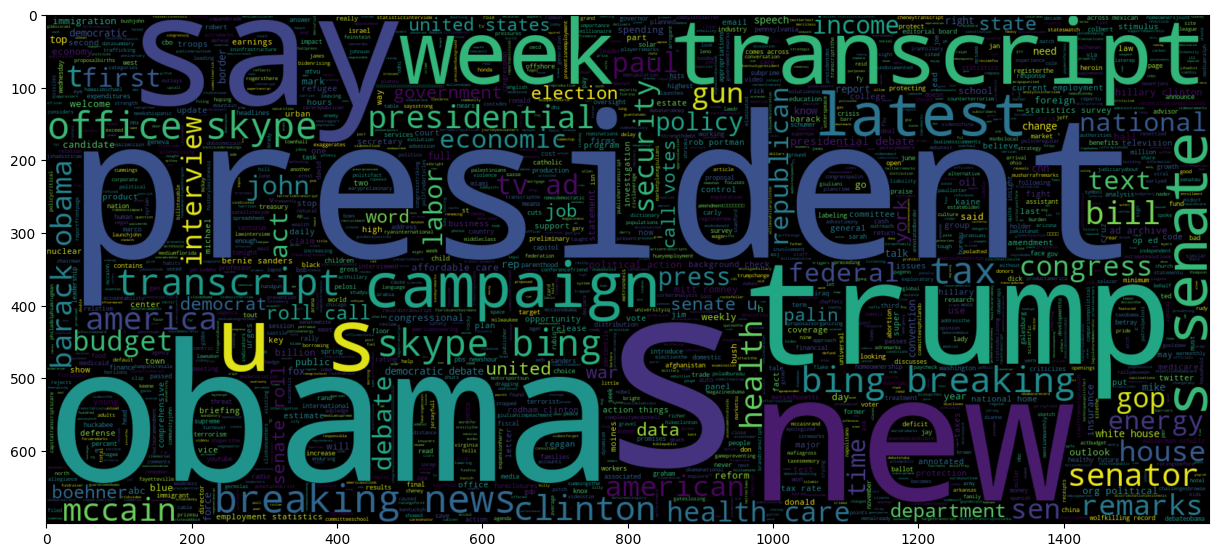

In [38]:
#word used in Real news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset3[Dataset3.label== 1].Article))
plt.imshow(wc, interpolation="bilinear")

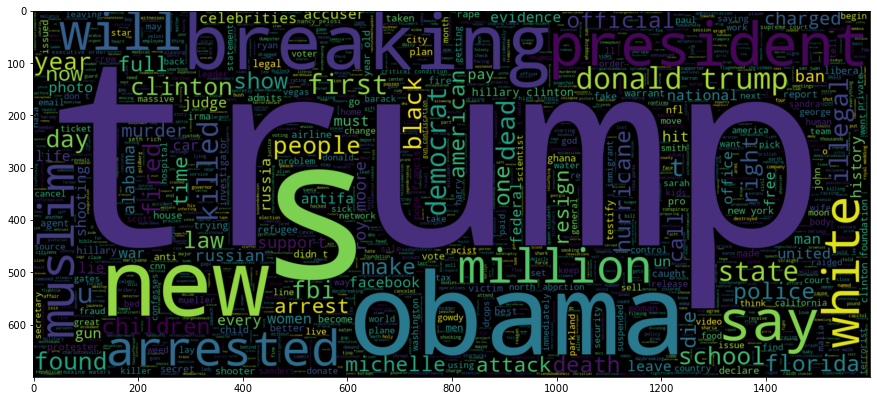

In [28]:
#word used in Fake news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset3[Dataset3.label== 0].Article))
plt.imshow(wc, interpolation="bilinear")

# Dataset 4

In [40]:
Dataset4 = pd.read_csv(r"C:\Users\Tanmay\Desktop\Fake news detection project\datasets\train.csv")

In [41]:
Dataset4.head()

id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1

In [42]:
Dataset4["Article"] = Dataset4["title"] + Dataset4["text"]
Dataset4.sample(frac = 1) #Shuffle 100%

Dataset4 = Dataset4.loc[:,['Article','label']]
Dataset4 = Dataset4.dropna()

In [43]:
##  Applying the wordpre method to the dataset
Dataset4['Article']=Dataset4['Article'].apply(wordpre)

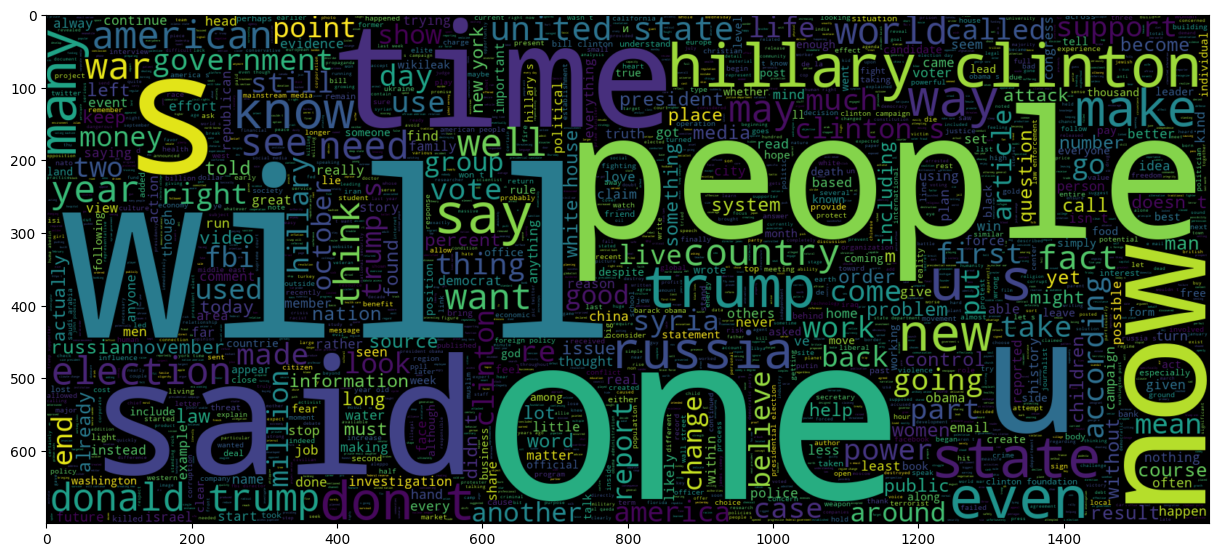

In [44]:
#word used in Real news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset4[Dataset4.label== 1].Article))
plt.imshow(wc, interpolation="bilinear")

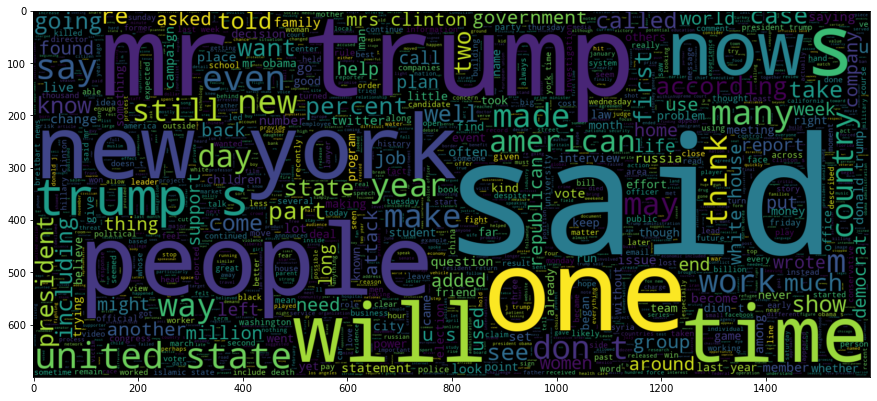

In [34]:
#word used in Fake news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset4[Dataset4.label== 0].Article))
plt.imshow(wc, interpolation="bilinear")

# Dataset 5

In [45]:
Dataset5 = pd.read_csv(r"C:\Users\Tanmay\Desktop\Fake news detection project\datasets\data.csv")

In [46]:
Dataset5

URLs  \
0     http://www.bbc.com/news/world-us-canada-414191...   
1     https://www.reuters.com/article/us-filmfestiva...   
2     https://www.nytimes.com/2017/10/09/us/politics...   
3     https://www.reuters.com/article/us-mexico-oil-...   
4     http://www.cnn.com/videos/cnnmoney/2017/10/08/...   
...                                                 ...   
4004  http://beforeitsnews.com/sports/2017/09/trends...   
4005  http://beforeitsnews.com/u-s-politics/2017/10/...   
4006  https://www.activistpost.com/2017/09/ron-paul-...   
4007  https://www.reuters.com/article/us-china-pharm...   
4008  http://beforeitsnews.com/u-s-politics/2017/10/...   

                                               Headline  \
0            Four ways Bob Corker skewered Donald Trump   
1     Linklater's war veteran comedy speaks to moder...   
2     Trump’s Fight With Corker Jeopardizes His Legi...   
3     Egypt's Cheiron wins tie-up with Pemex for Mex...   
4           Jason Aldean opens 'SNL' with Vegas tribute   
...                                                 ...   
4004                                    Trends to Watch   
4005  Trump Jr. Is Soon To Give A 30-Minute Speech F...   
4006        Ron Paul on Trump, Anarchism & the AltRight   
4007  China to accept overseas trial data in bid to ...   
4008  Vice President Mike Pence Leaves NFL Game Beca...   

                                                   Body  Label  
0     Image copyright Getty Images\nOn Sunday mornin...      1  
1     LONDON (Reuters) - “Last Flag Flying”, a comed...      1  
2     The feud broke into public view last week when...      1  
3     MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...      1  
4     Country singer Jason Aldean, who was performin...      1  
...                                                 ...    ...  
4004  Trends to Watch\n% of readers think this story...      0  
4005  Trump Jr. Is Soon To Give A 30-Minute Speech F...      0  
4006                                                NaN      0  
4007  SHANGHAI (Reuters) - China said it plans to ac...      1  
4008  Vice President Mike Pence Leaves NFL Game Beca...      0  

[4009 rows x 4 columns]

In [47]:
Dataset5["Article"] = Dataset5["Headline"] + Dataset5["Body"]
Dataset5["label"] = Dataset5["Label"]
Dataset5.sample(frac = 1) #Shuffle 100%
Dataset5 = Dataset5.loc[:,['Article','label']]
Dataset5 = Dataset5.dropna()

In [48]:
##  Applying the wordpre method to the dataset
Dataset5['Article']=Dataset5['Article'].apply(wordpre)

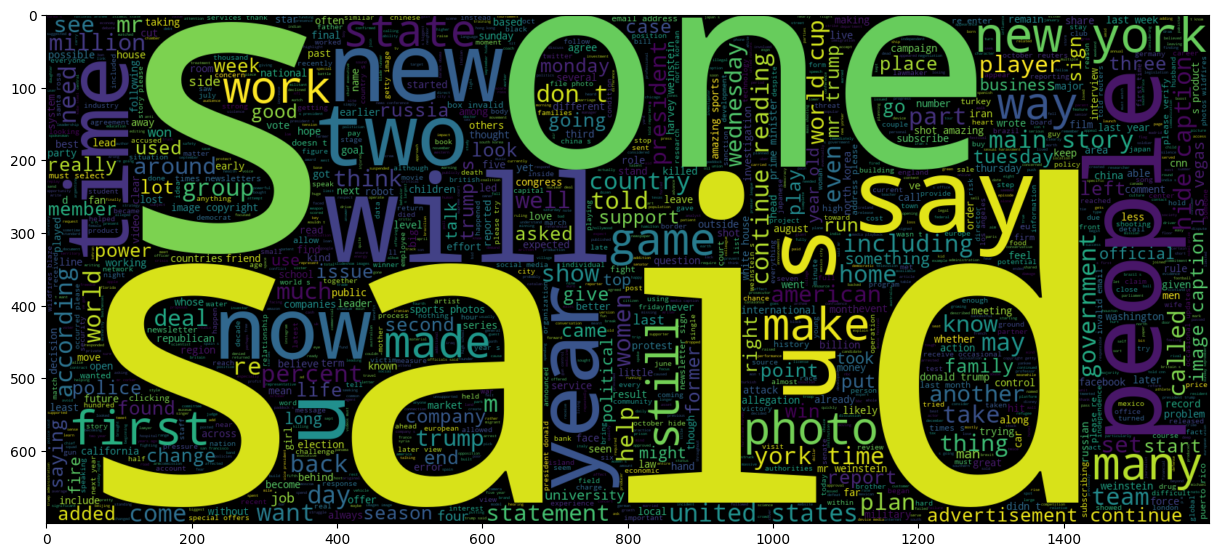

In [49]:
#word used in Real news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset5[Dataset5.label== 1].Article))
plt.imshow(wc, interpolation="bilinear")

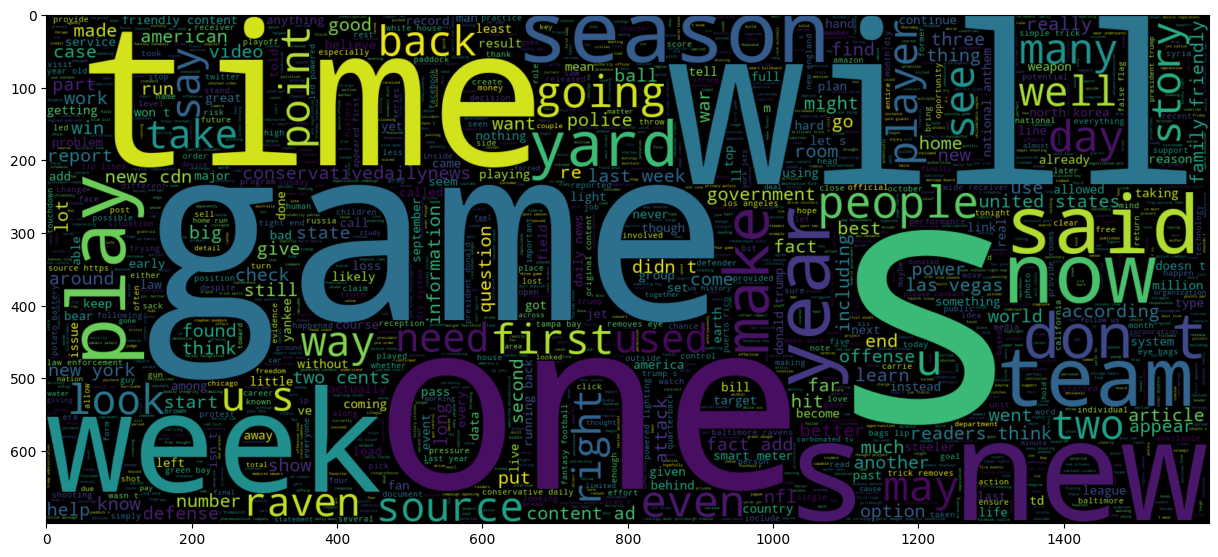

In [50]:
#word used in Real news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset5[Dataset5.label== 0].Article))
plt.imshow(wc, interpolation="bilinear")

In [51]:
#combining all the datset into one
frames = [Dataset1, Dataset2, Dataset3, Dataset4,Dataset5]
Dataset = pd.concat(frames)

In [52]:
Dataset.shape

(76899, 2)

In [53]:
x_train,x_test,y_train,y_test = train_test_split(Dataset['Article'], Dataset['label'], test_size=0.2, random_state=2020)

In [54]:
x_train.shape

(61519,)

In [55]:
x_test.shape

(15380,)

In [67]:
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

# Convert y_train and y_test to strings (if they contain numeric labels)
y_train = y_train.astype(str)
y_test = y_test.astype(str)


In [68]:
# Create a label encoder instance
label_encoder = LabelEncoder()

# Combine y_train and y_test to fit the encoder on all labels
all_labels = pd.concat([y_train, y_test])

# Fit the encoder on all_labels
label_encoder.fit(all_labels)


LabelEncoder()

In [69]:
# Transform y_train and y_test to numeric labels
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

In [71]:
#LogisticRegression
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

Logisticmodel = pipe.fit(x_train, y_train)
prediction = Logisticmodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
Logisticmodel_accuracy = round(accuracy_score(y_test, prediction)*100,2)

MemoryError: Unable to allocate 611. MiB for an array with shape (346, 231286) and data type float64

In [ ]:
#####DecisionTreeClassifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 10, 
                                           splitter='best', 
                                           random_state=2020))])
DecisionTreemodel = pipe.fit(x_train, y_train)
prediction = DecisionTreemodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
DecisionTreemodel_accuracy = round(accuracy_score(y_test, prediction)*100,2)

In [ ]:
#####RandomForestClassifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier())])

RandomForestmodel = pipe.fit(x_train, y_train) 
prediction = RandomForestmodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
RandomForestmodel_accuracy = round(accuracy_score(y_test, prediction)*100,2)

In [ ]:
#Stochastic Gradient Descent
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', SGDClassifier())])
SGDmodel = pipe.fit(x_train, y_train)
prediction = SGDmodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
SDGmodel_accuracy = round(accuracy_score(y_test, prediction)*100,2)

In [ ]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', GradientBoostingClassifier(loss = 'deviance',
                                                   learning_rate = 0.01,
                                                   n_estimators = 10,
                                                   max_depth = 5,
                                                   random_state=55))])

GBCmodel = pipe.fit(x_train, y_train)
prediction = GBCmodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
GBCmodel_accuracy = round(accuracy_score(y_test, prediction)*100,2)

In [ ]:
#GBClassifier
from xgboost import XGBClassifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', XGBClassifier(loss = 'deviance',
                                                   learning_rate = 0.01,
                                                   n_estimators = 10,
                                                   max_depth = 5,
                                                   random_state=2020))])

xgboostmodel = pipe.fit(x_train, y_train)
prediction = xgboostmodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
xgboostmodel_accuracy = round(accuracy_score(y_test, prediction)*100,2)

In [ ]:
#######Multinomial Naive Bayes Classifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', MultinomialNB())])

MNBCmodel = pipe.fit(x_train, y_train)
prediction = MNBCmodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
Multinomial_Naive_Bayes_accuracy = round(accuracy_score(y_test, prediction)*100,2)

In [ ]:
#############Bernoulli Naive Bayes Classifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', BernoulliNB())])

BNBCmodel = pipe.fit(x_train, y_train)
prediction = BNBCmodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
Bernoulli_Naive_Bayes_accuracy = round(accuracy_score(y_test, prediction)*100,2)

In [ ]:
x = ["SDGmodel_accuracy", "Logisticmodel_accuracy", "GBCmodel_accuracy", "xgboostmodel_accuracy" , 
     "DecisionTreemodel_accuracy","RandomForestmodel_accuracy","Multinomial_Naive_Bayes_accuracy",
     "Bernoulli_Naive_Bayes_accuracy"]
y =  [SDGmodel_accuracy,Logisticmodel_accuracy,GBCmodel_accuracy,xgboostmodel_accuracy,
      DecisionTreemodel_accuracy,RandomForestmodel_accuracy,Multinomial_Naive_Bayes_accuracy,
      Bernoulli_Naive_Bayes_accuracy]
plt.barh(x, y)

for index, value in enumerate(y):
    plt.text(value, index, str(value))

In [ ]:
import joblib  
# Save the model as a pickle in a file 
joblib.dump(Logisticmodel, 'model.pkl')  